# Titanic - Machine Learning from Disaster

## Data Overview

In [3]:
# read the csv file and have an overview of the data
import pandas as pd

df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This data set contain information about the passenger of the Titanic. It has 819 rows and 12 columns.

The 12 columns are:

* PassengerId(int): identiffication number of the passenger.
* Survived (int): wheter the passenger survived(1) or not(0).
* Pclass (int):  ticket class(1 = 1st, 2 = 2nd, 3 = 3rd).
* Name (object): name of the passenger.
* Sex (object): sex of the passenger.
* Age (float): age of the passengers in years
* SibSp (int): # of siblings / spouses aboard the Titanic.
* Parch (int): # of parents / children aboard the Titanic.
* Ticket (object): passenger Ticket number.
* Fare (float): passenger fare.
* Cabin (object): cabin number.
* Embarked (object): port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)

## Data Cleaning and Preprocesing

### Missing values

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling missing values in 'Age'

In [15]:
# using median imputation to handle the missing values
df['Age'] = df['Age'].fillna(df['Age'].median())

In [17]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling missing values in 'Cabin'

Drop 'column' because the missing values are a lot.

In [21]:
df.drop('Cabin', axis=1, inplace=True)

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

#### Handling missing values in 'Embarked'

In [26]:
# using mode imputation 
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [28]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Categorical Encoding

In [31]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

#### Encoding 'Sex'

In [34]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [36]:
# performing one hot encoding on 'Sex'
sex_enc = pd.get_dummies(df['Sex']).astype(int)
sex_enc

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [38]:
df_enc = pd.concat([df, sex_enc], axis=1)
df_enc.drop('Sex', axis=1, inplace=True)

In [40]:
df_enc.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,0,1


In [42]:
df_enc.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
female           int32
male             int32
dtype: object

#### Encoding 'Embarked'

In [45]:
df_enc['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder

#performing label encoding in 'Embarked'
le = LabelEncoder()
df_enc['Embarked'] = le.fit_transform(df_enc['Embarked'])

In [48]:
df_enc.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,2,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,2,0,1


#### Droping 'Name' and 'Ticket'

In [50]:
df_enc.drop(['Name', 'Ticket'], axis=1, inplace=True)
df_enc

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,1,0,3,22.0,1,0,7.2500,2,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0
2,3,1,3,26.0,0,0,7.9250,2,1,0
3,4,1,1,35.0,1,0,53.1000,2,1,0
4,5,0,3,35.0,0,0,8.0500,2,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,2,0,1
887,888,1,1,19.0,0,0,30.0000,2,1,0
888,889,0,3,28.0,1,2,23.4500,2,1,0
889,890,1,1,26.0,0,0,30.0000,0,0,1


### Correlation Matrix

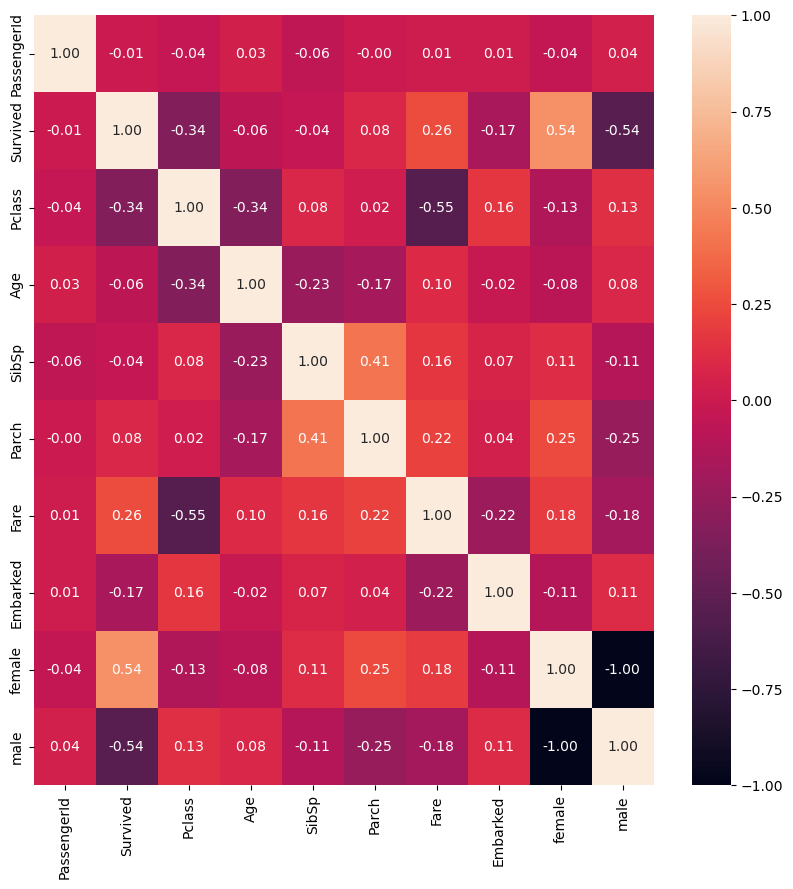

In [55]:
import matplotlib.pyplot as plt
import seaborn as sb

corr = df_enc.corr()
plt.figure(figsize=(10, 10))
sb.heatmap(corr, annot=True, fmt=".2f")
plt.show()

#### Observations:

"Male and Female show the highest correlation with the target feature 'Survived'. 'Parch' and 'SibSp' have the lowest correlation, so I decided to drop them as well."

### Feature Scaling and Data Spliting

In [60]:
from sklearn.model_selection import train_test_split

# spliting the target features and independet features
x = df_enc.drop(['Survived'] , axis=1)
y = df_enc['Survived']

# spliting de data in to train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Size of training data: {x_train.shape[0]}")
print(f"Size of test data: {x_test.shape[0]}")

Size of training data: 712
Size of test data: 179


Since there's still some outliers in the data I decided to use Robust Scaler

In [63]:
from sklearn.preprocessing import RobustScaler

# applying robust scaler
rs = RobustScaler()
x_train_scal = rs.fit_transform(x_train)
x_test_scal = rs.transform(x_test)

x_train = pd.DataFrame(x_train_scal, columns = x_train.columns, index = x_train.index)
x_test = pd.DataFrame(x_test_scal, columns = x_test.columns, index = x_test.index)

In [65]:
x_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
331,-0.270752,-2.0,1.346154,0.0,0.0,0.622184,0.0,0.0,0.0
733,0.625070,-1.0,-0.384615,0.0,0.0,-0.064416,0.0,0.0,0.0
382,-0.157103,0.0,0.307692,0.0,0.0,-0.289223,0.0,0.0,0.0
704,0.560446,0.0,-0.153846,1.0,0.0,-0.292359,0.0,0.0,0.0
813,0.803343,0.0,-1.692308,4.0,2.0,0.745107,0.0,1.0,-1.0


## Machine Learning Modeling

In [68]:
# import machine learning libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from statistics import mean
import numpy as np

### Logistic Regression

In [71]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [73]:
y_lr_pred = lr.predict(x_test)

In [75]:
#accuracy score
print(f"Accuracy score of Logistic Regression: {accuracy_score(y_test, y_lr_pred)}")

Accuracy score of Logistic Regression: 0.8100558659217877


In [77]:
# confusion matrix
lr_conf_matrix = confusion_matrix(y_test, y_lr_pred)
lr_conf_matrix

array([[90, 15],
       [19, 55]], dtype=int64)

In [79]:
# classification report
target_names = ['No Survived', 'Survived']
print(classification_report(y_test, y_lr_pred, target_names=target_names))

              precision    recall  f1-score   support

 No Survived       0.83      0.86      0.84       105
    Survived       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#### Observations:

This model have a 81 accuracy score, doing a better work predicting people who doesn't survived than predicting people who survived.

### Decision Tree Classifier

In [84]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [86]:
y_dt_pred = dt.predict(x_test)

In [88]:
#accuracy score
print(f"Accuracy score of Decision Tree Classifier: {accuracy_score(y_test, y_dt_pred)}")

Accuracy score of Decision Tree Classifier: 0.7541899441340782


In [90]:
# confusion matrix
lr_conf_matrix = confusion_matrix(y_test, y_dt_pred)
lr_conf_matrix

array([[85, 20],
       [24, 50]], dtype=int64)

In [92]:
# classification report
target_names = ['No Survived', 'Survived']
print(classification_report(y_test, y_dt_pred, target_names=target_names))

              precision    recall  f1-score   support

 No Survived       0.78      0.81      0.79       105
    Survived       0.71      0.68      0.69        74

    accuracy                           0.75       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.75      0.75      0.75       179



#### Observations

This model have a 75 accuracy score, doing a better work predicting people who doesn'y survived than predicting people who survived.

### Random Forest Clasiffier

In [97]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [98]:
y_rf_pred = rf.predict(x_test)

In [101]:
#accuracy score
print(f"Accuracy score of Decision Tree Classifier: {accuracy_score(y_test, y_rf_pred)}")

Accuracy score of Decision Tree Classifier: 0.8212290502793296


In [103]:
# confusion matrix
lr_conf_matrix = confusion_matrix(y_test, y_rf_pred)
lr_conf_matrix

array([[92, 13],
       [19, 55]], dtype=int64)

In [105]:
# classification report
target_names = ['No Survived', 'Survived']
print(classification_report(y_test, y_rf_pred, target_names=target_names))

              precision    recall  f1-score   support

 No Survived       0.83      0.88      0.85       105
    Survived       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



#### Observations:

This model have a 82 accuracy score, doing actually a good job predicting both, survivors and non survivors

### KNN (K Kneighbors Classifier)

In [110]:
# Test differents values of K to perform KNN
errors_rate = []
k_values = range(1,51)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors_rate.append(error)

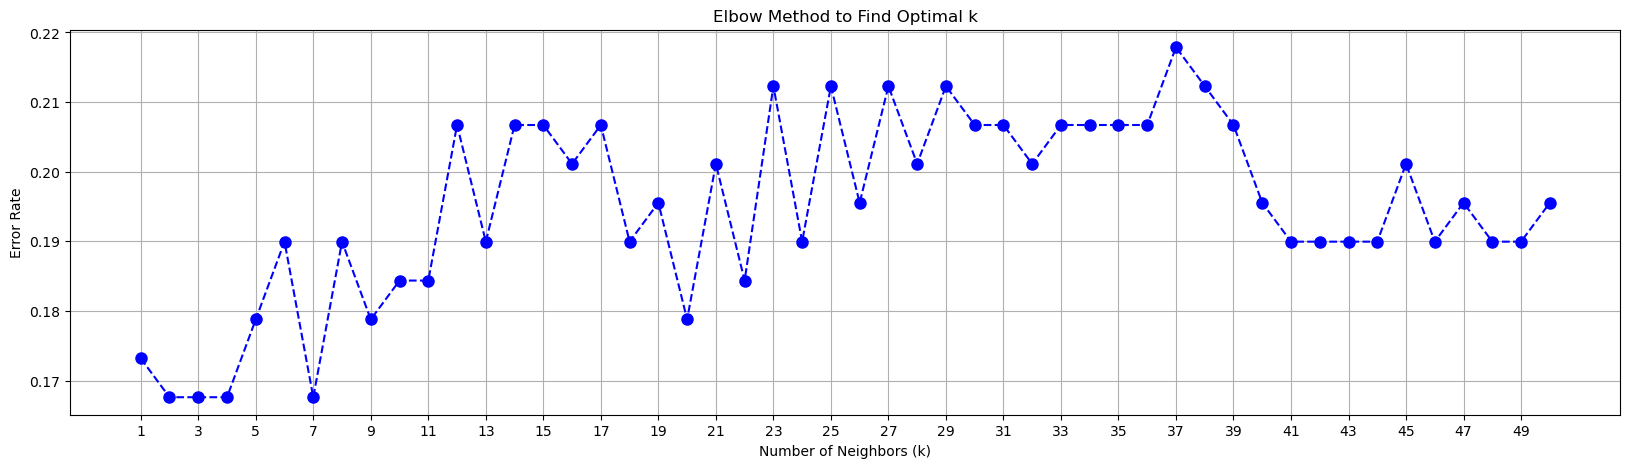

In [111]:
#Plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values, errors_rate, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 51, step=2))
plt.grid(True)
plt.show()

The error rate significantly decreased when k=2, k=3, k=4 and k=7. After that, we don't see any further dip.

In [115]:
# Calculate test accuracy when k=2, k=3, k=4 and k=7
for i in [2,3,4,7]:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)  # Train the model
    Y_pred = knn.predict(x_test)  # Predict on test set
    print(f"Accuracy score for KNN with {i} neighbors : {accuracy_score(y_test, y_pred)}")

Accuracy score for KNN with 2 neighbors : 0.8044692737430168
Accuracy score for KNN with 3 neighbors : 0.8044692737430168
Accuracy score for KNN with 4 neighbors : 0.8044692737430168
Accuracy score for KNN with 7 neighbors : 0.8044692737430168


Since the accuracy score is the same for the four k values, the next think is perform a cross validation, but only in odd values k=3 and k=7

In [118]:
#Calculate cross validation score k=3 and k=7
for i in [3,4]:
    score_k_i = cross_val_score(KNeighborsClassifier(n_neighbors=i), x_train, y_train, cv=5)
    avg_score_k_i = mean(score_k_i)
    print(f"Average score for {i} neighbors: {avg_score_k_i}")

Average score for 3 neighbors: 0.7724317935585541
Average score for 4 neighbors: 0.7780360484585837


The best average score is when k=7

In [121]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [123]:
y_knn_pred = knn.predict(x_test)

In [125]:
#accuracy score
print(f"Accuracy score of Decision Tree Classifier: {accuracy_score(y_test, y_knn_pred)}")

Accuracy score of Decision Tree Classifier: 0.8324022346368715


In [127]:
# confusion matrix
lr_conf_matrix = confusion_matrix(y_test, y_knn_pred)
lr_conf_matrix

array([[89, 16],
       [14, 60]], dtype=int64)

In [129]:
# classification report
target_names = ['No Survived', 'Survived']
print(classification_report(y_test, y_knn_pred, target_names=target_names))

              precision    recall  f1-score   support

 No Survived       0.86      0.85      0.86       105
    Survived       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



#### Observations:

This model have a accuracy score of 83, doing a better job predicting no survivors than predicting survivors

### SVM

In [134]:
svc = SVC(probability = True)
svc.fit(x_train, y_train)

SVC(probability=True)

In [136]:
y_svc_pred = svc.predict(x_test)

In [138]:
#accuracy score
print(f"Accuracy score of Logistic Regression: {accuracy_score(y_test, y_svc_pred)}")

Accuracy score of Logistic Regression: 0.8100558659217877


In [140]:
# confusion matrix
lr_conf_matrix = confusion_matrix(y_test, y_svc_pred)
lr_conf_matrix

array([[91, 14],
       [20, 54]], dtype=int64)

In [142]:
# classification report
target_names = ['No Survived', 'Survived']
print(classification_report(y_test, y_svc_pred, target_names=target_names))

              precision    recall  f1-score   support

 No Survived       0.82      0.87      0.84       105
    Survived       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



#### Obervations:

The accuracy score of this model is 81, doing a good job predicting both, survivors and non survivors

### XGBoost

In [147]:
xgbc = XGBClassifier(eval_metric = 'logloss')
xgbc.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [149]:
y_xgbc_pred = xgbc.predict(x_test)

In [151]:
#accuracy score
print(f"Accuracy score of Logistic Regression: {accuracy_score(y_test, y_xgbc_pred)}")

Accuracy score of Logistic Regression: 0.7877094972067039


In [153]:
# confusion matrix
lr_conf_matrix = confusion_matrix(y_test, y_xgbc_pred)
lr_conf_matrix

array([[88, 17],
       [21, 53]], dtype=int64)

In [155]:
# classification report
target_names = ['No Survived', 'Survived']
print(classification_report(y_test, y_xgbc_pred, target_names=target_names))

              precision    recall  f1-score   support

 No Survived       0.81      0.84      0.82       105
    Survived       0.76      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



#### Observations:

This model have a 79 of accuracy score, doing a better job predicting non survivors than survivors

### AUC-ROC Curve

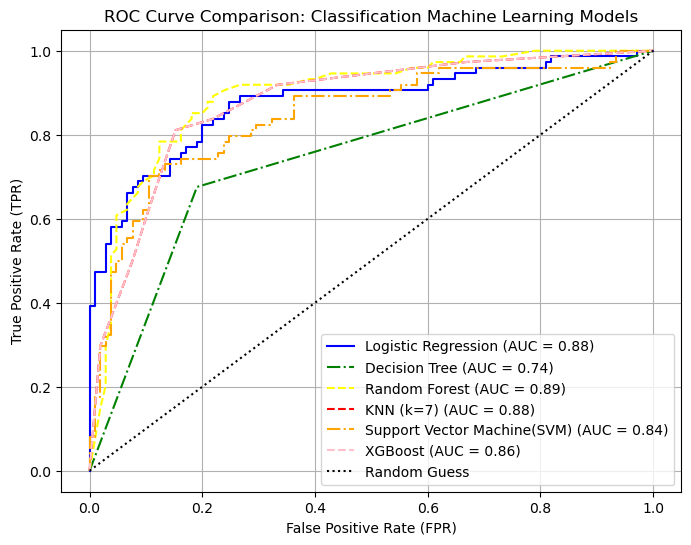

In [160]:
y_lr_probs = lr.predict_proba(x_test)[:, 1]
y_dt_probs = dt.predict_proba(x_test)[:, 1]
y_rf_probs = rf.predict_proba(x_test)[:, 1]
y_knn_probs = knn.predict_proba(x_test)[:, 1]
y_svm_probs = svc.predict_proba(x_test)[:, 1]
y_xgbc_probs = xgbc.predict_proba(x_test)[:,1]

# Compute ROC curve and AUC for all the models
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_lr_probs)
auc_lr = auc(fpr_lr, tpr_lr)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_knn_probs)
auc_knn = auc(fpr_knn, tpr_knn)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_svm_probs)
auc_svm = auc(fpr_svm, tpr_svm)

fpr_xgbc, tpr_xgbc, _ = roc_curve(y_test, y_xgbc_probs)
auc_xgbc = auc(fpr_xgbc, tpr_xgbc)

# Plot both ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_dt, tpr_dt, color='green', linestyle='dashdot', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='yellow', linestyle='dashed', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='red', linestyle='dashed', label=f'KNN (k=7) (AUC = {auc_knn:.2f})')
plt.plot(fpr_svm, tpr_svm, color='orange', linestyle='dashdot', label=f'Support Vector Machine(SVM) (AUC = {auc_svm:.2f})')
plt.plot(fpr_knn, tpr_knn, color='pink', linestyle='dashed', label=f'XGBoost (AUC = {auc_xgbc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='dotted', label='Random Guess')

# Labels and Title
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve Comparison: Classification Machine Learning Models")
plt.legend()
plt.grid(True)
plt.show()

#### Observations:

The Random Forest Classifier achieved the best performance with an AUC score of 0.89 and an accuracy score of 0.82. Therefore, I chose Random Forest as the final model for the test data.

## 

## Using Random Forest Classifier in test.csv file

In [162]:
df_test = pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Cleaning and Preprocessing

In [165]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [167]:
# using median imputation to handle the missing values
df_test['Age'] = df_test['Age'].fillna(df['Age'].median())

In [169]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [171]:
# droping 'Cabin'
df_test.drop('Cabin', axis=1, inplace=True)

In [173]:
# using median imputation to handle the missing values
df_test['Fare'] = df_test['Fare'].fillna(df['Fare'].mean())

In [175]:
df_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [177]:
df_test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [179]:
df_test['Sex'].unique()

array(['male', 'female'], dtype=object)

In [181]:
# performing one hot encoding on 'Sex'
sex_enc = pd.get_dummies(df_test['Sex']).astype(int)
sex_enc

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
413,0,1
414,1,0
415,0,1
416,0,1


In [183]:
df_enc_test = pd.concat([df_test, sex_enc], axis=1)
df_enc_test.drop('Sex', axis=1, inplace=True)

In [185]:
df_enc_test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,female,male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,Q,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,S,1,0


In [187]:
# encoding 'Embarked'
df_enc_test['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [189]:
le = LabelEncoder()
df_enc_test['Embarked'] = le.fit_transform(df_enc_test['Embarked'])

In [191]:
# droping 'Name' and 'Ticket'
df_enc_test.drop(['Name', 'Ticket'], axis=1, inplace=True)
df_enc_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,892,3,34.5,0,0,7.8292,1,0,1
1,893,3,47.0,1,0,7.0000,2,1,0
2,894,2,62.0,0,0,9.6875,1,0,1
3,895,3,27.0,0,0,8.6625,2,0,1
4,896,3,22.0,1,1,12.2875,2,1,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,28.0,0,0,8.0500,2,0,1
414,1306,1,39.0,0,0,108.9000,0,1,0
415,1307,3,38.5,0,0,7.2500,2,0,1
416,1308,3,28.0,0,0,8.0500,2,0,1


In [193]:
# Scaling the data
x_test_scaled = rs.transform(df_enc_test)

In [195]:
x_df_enc_test = pd.DataFrame(x_test_scaled, columns = df_enc_test.columns, index = df_enc_test.index)

In [197]:
x_df_enc_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0.977159,0.0,0.500000,0.0,0.0,-0.293466,-1.0,0.0,0.0
1,0.979387,0.0,1.461538,1.0,0.0,-0.330197,0.0,1.0,-1.0
2,0.981616,-1.0,2.615385,0.0,0.0,-0.211150,-1.0,0.0,0.0
3,0.983844,0.0,-0.076923,0.0,0.0,-0.256554,0.0,0.0,0.0
4,0.986072,0.0,-0.461538,1.0,1.0,-0.095978,0.0,1.0,-1.0


In [199]:
predictions = rf.predict(x_df_enc_test)

In [201]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [203]:
submission = pd.DataFrame({
    'PassengerId': df_enc_test['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission_2.csv', index=False)